In [ ]:
#============================== PROJECT MACHINE LEARNING 1 - Dasar ===============================================
#=============================== Muhammad Iodine Hanifan Firdaus    ==============================================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/belajar_machine_learning_dicoding/dataset/dataset_project_1

Mounted at /content/drive
/content/drive/MyDrive/belajar_machine_learning_dicoding/dataset/dataset_project_1


In [ ]:
%pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders as s_folder
import os

dir_train = 'dataset'
dir_val = 'data_siap'

s_folder.ratio(dir_train, output = dir_val, seed=42, ratio=(0.6, 0.4))


Copying files: 2189 files [00:20, 108.40 files/s]


In [ ]:
#=================================== Generate Model ==================================

import os
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'data_siap'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

train_gen = ImageDataGenerator(
                      rescale = 1./255
)

val_gen = ImageDataGenerator(
                      rescale = 1./255
)


train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size = (200,200),
    batch_size = 4,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size = (200,200),
    batch_size = 4,
    class_mode = 'categorical'
)

#USING VGG16 16
model = tf.keras.models.Sequential([
        tf.keras.layers.ZeroPadding2D(12,  input_shape=(200, 200, 3)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

#compile model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adadelta(learning_rate=0.1),
    metrics = ['accuracy']
)



Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_8 (ZeroPaddi  (None, 224, 224, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_105 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 112, 112, 128)     73856     
                                     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = 'model_save/vgg16_1.h5'

checkpoint = ModelCheckpoint(
    model_path, 
    monitor='accuracy', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False,
    save_freq="epoch",
    mode='max'
    )



Epoch 1/40

Epoch 1: accuracy improved from -inf to 0.35938, saving model to model_save/vgg16_1.h5
32/32 - 13s - loss: 1.0955 - accuracy: 0.3594 - val_loss: 1.1063 - val_accuracy: 0.3125 - 13s/epoch - 395ms/step
Epoch 2/40

Epoch 2: accuracy did not improve from 0.35938
32/32 - 4s - loss: 1.1023 - accuracy: 0.3203 - val_loss: 1.0960 - val_accuracy: 0.4062 - 4s/epoch - 131ms/step
Epoch 3/40

Epoch 3: accuracy improved from 0.35938 to 0.37500, saving model to model_save/vgg16_1.h5
32/32 - 11s - loss: 1.0926 - accuracy: 0.3750 - val_loss: 1.0893 - val_accuracy: 0.4062 - 11s/epoch - 356ms/step
Epoch 4/40

Epoch 4: accuracy did not improve from 0.37500
32/32 - 4s - loss: 1.0975 - accuracy: 0.3281 - val_loss: 1.0907 - val_accuracy: 0.4219 - 4s/epoch - 134ms/step
Epoch 5/40

Epoch 5: accuracy did not improve from 0.37500
32/32 - 4s - loss: 1.1410 - accuracy: 0.3516 - val_loss: 1.0903 - val_accuracy: 0.5938 - 4s/epoch - 134ms/step
Epoch 6/40

Epoch 6: accuracy improved from 0.37500 to 0.56250,

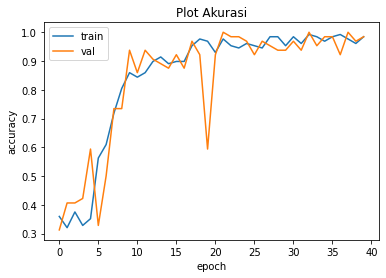

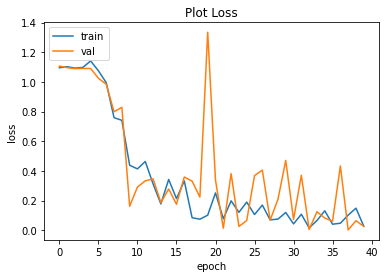

model save to model_save/vgg16_1.h5


In [ ]:
import keras
from matplotlib import pyplot as plt

#train model
train_model = model.fit(
    train_generator,
    steps_per_epoch=32,
    epochs=40,
    validation_data=val_generator,
    validation_steps=16,
    verbose=2,
    callbacks=[checkpoint]
)

tf.keras.utils.plot_model(model, to_file="train_plot/model_plot.png", show_shapes=True)

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Plot Akurasi')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Plot Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print("model save to " + model_path)

Saving 1yeoLbmp4alVOtFv.png to 1yeoLbmp4alVOtFv (7).png
1yeoLbmp4alVOtFv.png
Kertas


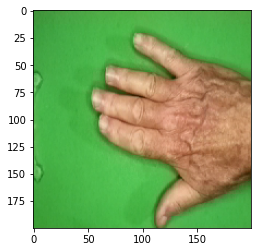

In [ ]:
#============================== test model ===============================
import keras
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
file = files.upload()
 
for fn in file.keys():
  path = fn
  gambar = image.load_img(path, target_size=(200,200))
 
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  model = keras.models.load_model('model_save/vgg16_1.h5')
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0][0] == 1.0:
    print('Kertas')
  if classes[0][1] == 1.0:
    print('Batu')
  if classes[0][2] == 1.0:
    print('Gunting')

Saving 7cNxwgrraQGeA1LA.png to 7cNxwgrraQGeA1LA (1).png
7cNxwgrraQGeA1LA.png
Batu


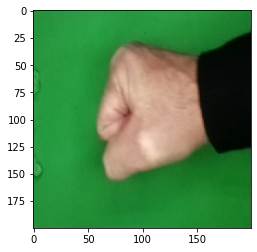

In [ ]:
#============================== test model ===============================

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
file = files.upload()
 
for fn in file.keys():
  path = fn
  gambar = image.load_img(path, target_size=(200,200))
 
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  model = keras.models.load_model('model_save/vgg16_1.h5')
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0][0] == 1.0:
    print('Kertas')
  if classes[0][1] == 1.0:
    print('Batu')
  if classes[0][2] == 1.0:
    print('Gunting')

Saving dnXr5NzZKqzg8VgI.png to dnXr5NzZKqzg8VgI.png
dnXr5NzZKqzg8VgI.png
Gunting


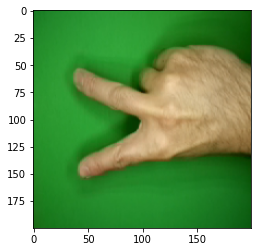

In [ ]:
#============================== test model ===============================

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
file = files.upload()
 
for fn in file.keys():
  path = fn
  gambar = image.load_img(path, target_size=(200,200))
 
  imgplot = plt.imshow(gambar)
  x = image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  model = keras.models.load_model('model_save/vgg16_1.h5')
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0][0] == 1.0:
    print('Kertas')
  if classes[0][1] == 1.0:
    print('Batu')
  if classes[0][2] == 1.0:
    print('Gunting')